In [14]:
import matplotlib.pyplot as plt 
import pandas as pd
from pandas import DataFrame
import numpy as np
import re

from database import dbComands



In [16]:
    tweets = dbComands.runComandFetchall("SELECT text FROM twitter.tweet")
    map_words = {}
    p = re.compile("@|#|/")#"@|#|/|covid"
    for tweet in tweets:
        words = tweet[0].split()
        for word in words:
            if(p.search(word.lower())):
                if(word in map_words.keys()):
                    map_words[word] = map_words[word] + 1
                else:
                    map_words[word] = 1
    x = 0
    max_words   = []
    repetitions = []
    while x < 10:
        all_keys        = list(map_words.keys())
        all_values      = list(map_words.values())
        max_value       = max(all_values)
        max_value_index = all_values.index(max_value)
        bigest_key      = all_keys[max_value_index]
        
        max_words.insert(0, bigest_key)
        repetitions.insert(0, max_value)
        del map_words[bigest_key]
        x += 1
        


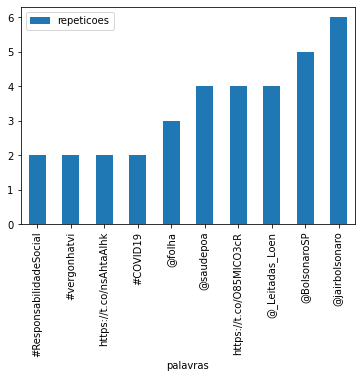

In [20]:
Data = {"palavras" : max_words, "repeticoes" : repetitions}
df = DataFrame(Data,columns=['palavras','repeticoes'])
df.plot(x ='palavras', y='repeticoes', kind = 'bar')
plt.show()
